In [15]:
datasetName = 'brain_cortex_Gaublomme2019_part2'
#datasetName value: organ_tissue_authorYear without space
dataFormat = '10X'
#dataFormat value: tsv (tab separated), 10X (sparse)
setwd("/stor/public/hcad/brain_cortex_Gaublomme2019_part2")

In [16]:
library(Seurat)
library(data.table)
library(ggplot2)
# Load the organized dataset
if(dataFormat == 'tsv'){
    data.matrix <- data.table::fread(paste0(datasetName,"_expression.tsv.gz"), h = T, data.table = F)
} else{
   # system(paste0("tar -zxvf ", datasetName, "_expression.tar.gz")) #Invoke the unix command
   data.matrix <- Read10X(data.dir = paste0(datasetName,"_expression"))
   # data.dir: Directory containing the matrix.mtx, genes.tsv (or features.tsv), and barcodes.tsv files provided by 10X.
}
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 4)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)

In [17]:
data.matrix[1:5, 1:5]
data.metadata[1:5, ]
data.annotation[1:5,]

5 x 5 sparse Matrix of class "dgCMatrix"
             500nuc-AAACCTGAGATGCCTT 500nuc-AAACCTGAGCACAGGT
RP11-34P13.3                       .                       .
FAM138A                            .                       .
RP11-34P13.7                       .                       .
FO538757.3                         .                       .
FO538757.2                         .                       .
             500nuc-AAACCTGCACCCTATC 500nuc-AAACCTGGTACTTAGC
RP11-34P13.3                       .                       .
FAM138A                            .                       .
RP11-34P13.7                       .                       .
FO538757.3                         .                       .
FO538757.2                         .                       .
             500nuc-AAACCTGGTAGGGACT
RP11-34P13.3                       .
FAM138A                            .
RP11-34P13.7                       .
FO538757.3                         .
FO538757.2                         .

,organ,region,subregion,donor_ID,donor_gender,donor_age
,<fct>,<fct>,<fct>,<lgl>,<lgl>,<lgl>
500nuc-AAACCTGAGATGCCTT,brain,cortex,dorsolateral prefrontal cortex,NA,NA,NA
500nuc-AAACCTGAGCACAGGT,brain,cortex,dorsolateral prefrontal cortex,NA,NA,NA
500nuc-AAACCTGCACCCTATC,brain,cortex,dorsolateral prefrontal cortex,NA,NA,NA
500nuc-AAACCTGGTACTTAGC,brain,cortex,dorsolateral prefrontal cortex,NA,NA,NA
500nuc-AAACCTGGTAGGGACT,brain,cortex,dorsolateral prefrontal cortex,NA,NA,NA


[1] Oligodendrocyte      Astrocyte            Glutamatergic neuron
[4] Glutamatergic neuron Glutamatergic neuron
7 Levels: Astrocyte Endothelial cell GABAergic neuron ... OPC

In [18]:
# Pre-processing for part 2
min.cells = 5
min.features = 200
nFeature_RNA_range = c(200, 6000)
percent.mt.thre = 10
# Modify the default value of these parameters according to original paper
dataobj <- CreateSeuratObject(counts = data.matrix, project = datasetName, min.features = min.features, meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [19]:
dataobj@assays

$RNA
Assay data with 29110 features for 39086 cells
First 10 features:
 RP11-34P13.3, FAM138A, RP11-34P13.7, FO538757.3, FO538757.2,
AP006222.2, RP5-857K21.15, RP4-669L17.10, RP5-857K21.4, RP5-857K21.2 


In [20]:
# Normalization
# Two approaches
# 1. run standard log normalization 
# dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj, selection.method = 'vst', mean.cutoff = c(0.5, Inf)) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(object = dataobj))
# dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))
# 2. run sctransform 
# dataobj <- SCTransform(dataobj, vars.to.regress = "percent.mt", do.correct.umi = TRUE, do.scale = TRUE, do.center = TRUE)

Centering and scaling data matrix



In [21]:
length(VariableFeatures(object = dataobj))

[1] 2000

In [22]:
# Dimensional Reduction
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))
# Determine the ‘dimensionality’ of the dataset according to elbow plot

PC_ 1 
Positive:  SLC1A3, NEAT1, ZBTB20, QKI, GLUL, FBXL7, SLC1A2, PON2, PREX2, RNF219-AS1 
	   GJA1, HEPN1, CDH20, PTGDS, TPD52L1, LINC00499, MT2A, AQP4, NCKAP5, ADGRV1 
	   NKAIN3, ATP1A2, RANBP3L, NFIA, ERBB4, PARD3, GRAMD3, DLC1, HIF3A, PARD3B 
Negative:  SYT1, RBFOX1, KCNQ5, CSMD1, STXBP5L, MEG3, OPCML, ATRNL1, RALYL, KHDRBS2 
	   KCNIP4, SNTG1, LRRTM4, RYR2, IQCJ-SCHIP1, LINGO2, HS6ST3, DGKB, CDH12, KCNH7 
	   ROBO2, CNTN5, CADPS2, FAM19A1, GALNTL6, AC011288.2, CBLN2, NRG1, DPP10, DCC 
PC_ 2 
Positive:  PLP1, ST18, TMEM144, CLDN11, LINC01608, MBP, CTNNA3, PIP4K2A, RNF220, KCNH8 
	   EDIL3, CNP, MIR219A2, ABCA8, ENPP2, SLCO1A2, DOCK10, MOBP, FRMD4B, UGT8 
	   ANLN, CNDP1, C10orf90, QDPR, LPAR1, SPOCK3, DOCK5, SEPP1, FAM107B, CREB5 
Negative:  GPC5, ADGRV1, SLC1A2, RNF219-AS1, TPD52L1, PRKG1, GJA1, AQP4, PITPNC1, RYR3 
	   NKAIN3, RANBP3L, HPSE2, PARD3, BMPR1B, LINC00499, ATP1A2, SLC1A3, PTPRZ1, ZNF98 
	   SLC7A11, NHSL1, COL5A3, ATP1B2, SLC14A1, SLCO1C1, FGFR3, HIF3A, PARD3B, ARHG

Warning message in ElbowPlot(dataobj, ndims = 100):
“The object only has information for 50 reductions”


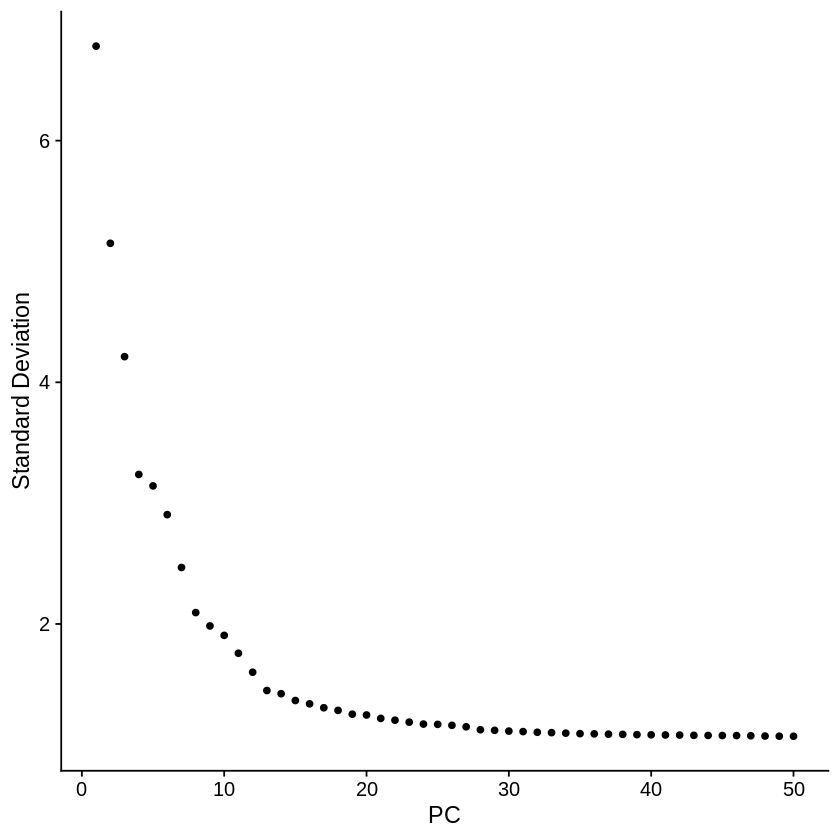

In [23]:
ElbowPlot(dataobj, ndims = 100) 
# pdf(paste0(datasetName,"seurat.elbowplot.pdf"))

In [24]:
dev.off()
pcDim = 50 # set as 75 in this case 
dataobj <- RunTSNE(dataobj, dims = 1:pcDim)
DimPlot(dataobj, reduction = "tsne", label = TRUE)
# ggsave(paste0(datasetName,".seurat.umap.tiff", plot = p_umap, width = 8, height = 5)

null device 
          1

In [38]:
# Clusters marked by Seurat clustering results
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim)
dataobj <- FindClusters(dataobj, resolution = 1.3)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 39086
Number of edges: 2169500

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8684
Number of communities: 29
Elapsed time: 14 seconds


1 singletons identified. 28 final clusters.



07:58:12 UMAP embedding parameters a = 0.9922 b = 1.112

07:58:12 Read 39086 rows and found 50 numeric columns

07:58:12 Using Annoy for neighbor search, n_neighbors = 30

07:58:12 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

07:58:20 Writing NN index file to temp file /tmp/RtmpADbtcX/file43fc65fc9237

07:58:20 Searching Annoy index using 1 thread, search_k = 3000

07:58:40 Annoy recall = 100%

07:58:40 Commencing smooth kNN distance calibration using 1 thread

07:58:42 Initializing from normalized Laplacian + noise

07:58:46 Commencing optimization for 200 epochs, with 1934474 positive edges

07:59:38 Optimization finished



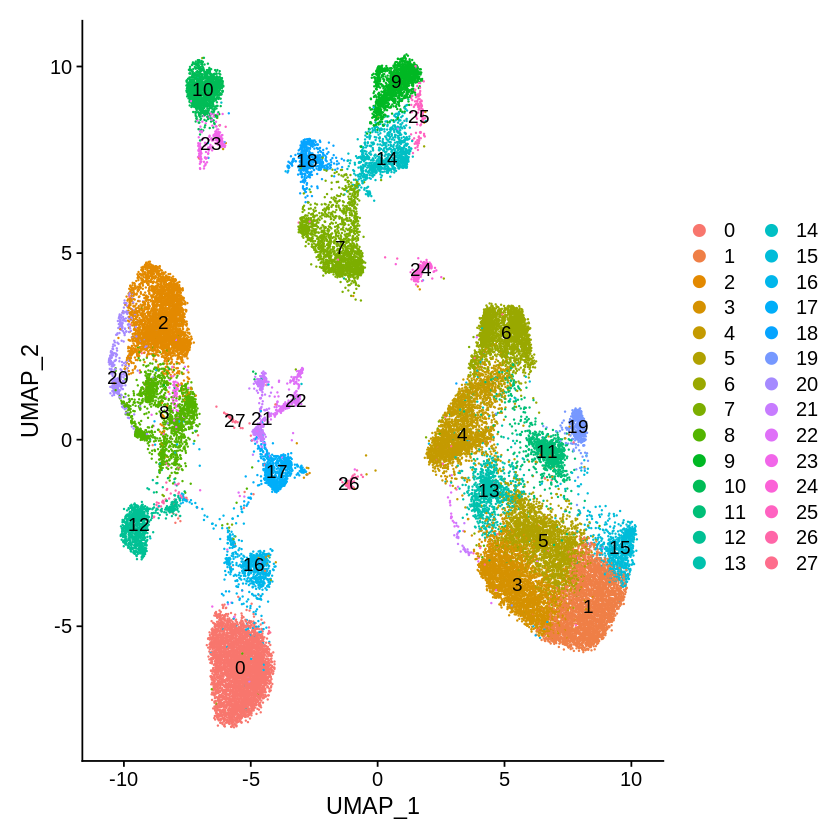

In [39]:
# umap
dataobj <- RunUMAP(dataobj, dims = 1:pcDim)
p_umap <- DimPlot(dataobj, reduction = "umap", label = TRUE)
p_umap

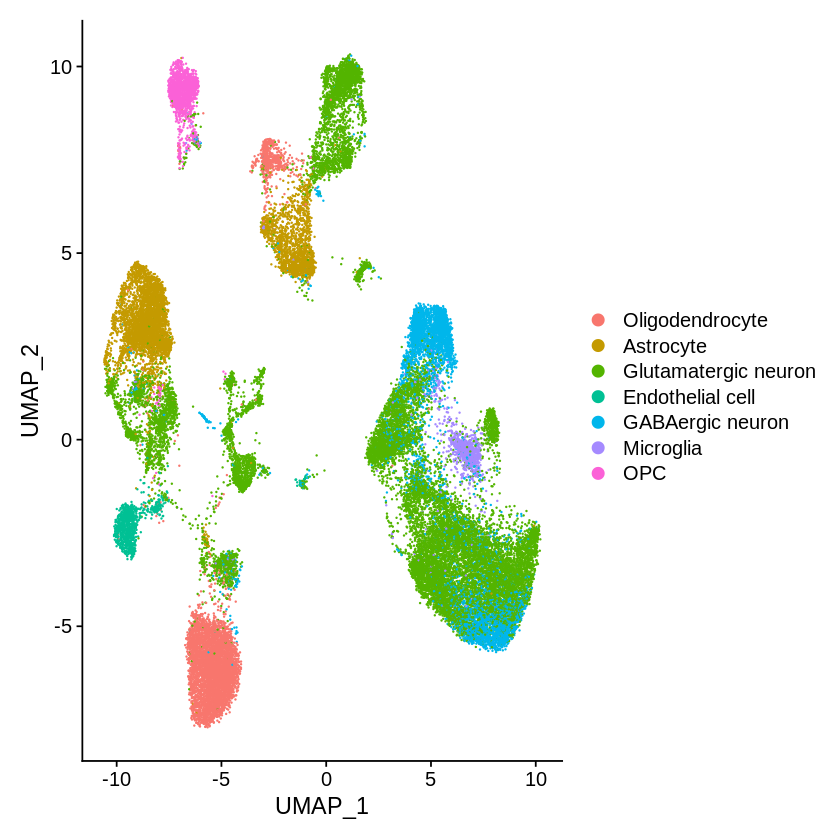

In [37]:
# Clusters marked by given identities
Idents(dataobj) <- as.character(data.annotation$annotation)
p_umap <- DimPlot(dataobj, reduction = "umap", label = FALSE)
p_umap

In [31]:
ggsave(paste0(datasetName,".seurat.umap1.tiff"), plot = p_umap, width = 8, height = 5)

In [30]:
annotation <- as.data.frame(cbind(colnames(data.matrix), as.character(data.annotation$annotation), seurat_cluster = as.character(Idents(dataobj))))
annotation <- annotation[, -1]
annotation <- annotation[order(annotation$seurat_cluster, annotation$V2), ]
print(annotation)

                        V2 seurat_cluster
28058            Astrocyte              0
9093      Endothelial cell              0
13527     Endothelial cell              0
22244     Endothelial cell              0
24271     Endothelial cell              0
30503     Endothelial cell              0
31911     Endothelial cell              0
7060      GABAergic neuron              0
12659     GABAergic neuron              0
26063     GABAergic neuron              0
35466     GABAergic neuron              0
3611  Glutamatergic neuron              0
5956  Glutamatergic neuron              0
7362  Glutamatergic neuron              0
18510 Glutamatergic neuron              0
19253 Glutamatergic neuron              0
20306 Glutamatergic neuron              0
20998 Glutamatergic neuron              0
21478 Glutamatergic neuron              0
26714 Glutamatergic neuron              0
33279 Glutamatergic neuron              0
35992 Glutamatergic neuron              0
37280 Glutamatergic neuron        

In [40]:
new.cluster.ids <- c("Oligodendrocyte", "Glutamatergic neuron", "Astrocyte", "Glutamatergic neuron", "Glutamatergic neuron", "Glutamatergic neuron"
                    , "GABAergic neuron", "Astrocyte", "Glutamatergic neuron", "Glutamatergic neuron", "OPC", "Microglia", "Endothelial cell"
                    , "Glutamatergic neuron", "Glutamatergic neuron", "Glutamatergic neuron", "Glutamatergic neuron", "Glutamatergic neuron"
                    , "Oligodendrocyte", "Glutamatergic neuron", "Glutamatergic neuron", "Glutamatergic neuron", "Glutamatergic neuron"
                    , "OPC", "Glutamatergic neuron", "Glutamatergic neuron", "Endothelial cell", "GABAergic neuron")
names(new.cluster.ids) <- levels(dataobj)
dataobj <- RenameIdents(dataobj, new.cluster.ids)

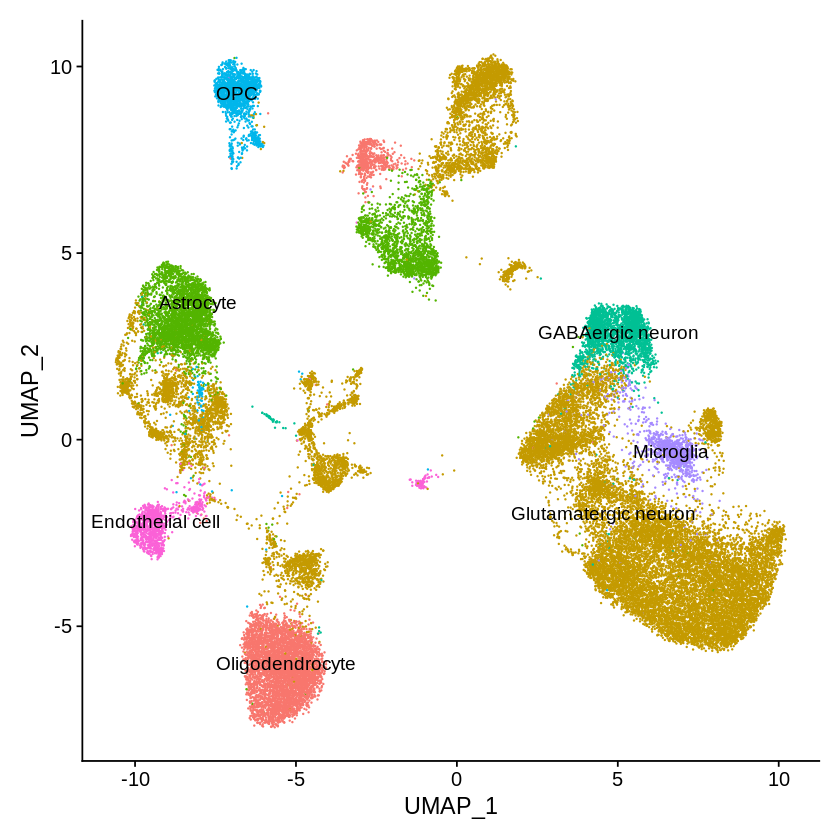

In [34]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE) + NoLegend()
p_umap2

In [35]:
ggsave(paste0(datasetName,".seurat.umap2.tiff"), plot = p_umap2, width = 8, height = 5)

In [41]:
# Finding cluster markers 
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)


Calculating cluster Oligodendrocyte

Calculating cluster Glutamatergic neuron

Calculating cluster Astrocyte

Calculating cluster GABAergic neuron

Calculating cluster OPC

Calculating cluster Microglia

Calculating cluster Endothelial cell



In [42]:
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [6]:
datasetName = 'brain_cortex_Gaublomme2019_part2'
setwd("/stor/public/hcad/brain_cortex_Gaublomme2019_part2")
marker <- read.delim(file = paste0(datasetName,".seurat.markers.txt"))

In [9]:
marker[order(marker$cluster),]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1308,0,2.962944,0.402,0.051,0,Astrocyte,GJA1
1309,0,2.816752,0.678,0.236,0,Astrocyte,SLC1A2
1310,0,2.770408,0.347,0.046,0,Astrocyte,LINC00499
1311,0,2.584228,0.392,0.082,0,Astrocyte,AQP4
1312,0,2.557661,0.265,0.036,0,Astrocyte,FGFR3
1313,0,2.553345,0.431,0.110,0,Astrocyte,HPSE2
1314,0,2.511330,0.404,0.091,0,Astrocyte,RNF219-AS1
1315,0,2.483832,0.433,0.096,0,Astrocyte,TPD52L1
1316,0,2.453733,0.603,0.224,0,Astrocyte,ADGRV1


In [10]:
levels(marker$cluster)

[1] "Astrocyte"            "Endothelial cell"     "GABAergic neuron"    
[4] "Glutamatergic neuron" "Microglia"            "Oligodendrocyte"     
[7] "OPC"